# Session 3: Multivariable

I'm not aware of any non-parametric approach suited for this task. And therefore, we are going to employ parametric or semi-parametric methods for this chapter.

Multivariable analysis typically involves working with multiple independent variables to understand their impact on a dependent variable. Often, we use parametric methods for this analysis as they provide a useful framework when the assumptions of these methods are met. However, in cases where the assumptions of parametric methods are not met, semi-parametric methods can be helpful. Unfortunately, non-parametric methods are not well-suited for multivariable analysis due to their limitations in handling multiple independent variables. In this chapter, we'll focus on parametric and semi-parametric methods, exploring how they can be used in Stata  


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


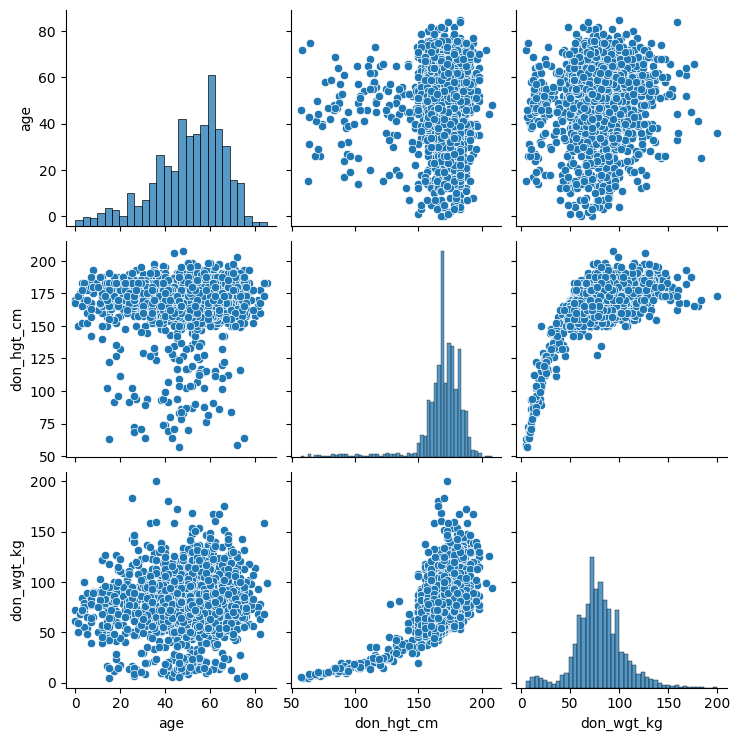

In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
import io 

# Load the data from the URL using requests
url = 'https://raw.githubusercontent.com/jhustata/livre/main/transplants.txt'
response = requests.get(url)
content = response.content.decode('utf-8')
file = io.StringIO(content)
data = pd.read_csv(file, sep='\t')

age = data['age']

# Assuming 'weight' is another column in your dataset
weight = data['don_wgt_kg']

# Assuming there are more relevant numerical columns, 
# subset the dataframe
subset = data[['age', 'don_hgt_cm', 'don_wgt_kg', 'dx']]

# Generate a pairplot
sns.pairplot(subset)

# Save the figure
plt.savefig('pairplot.png')
plt.show()


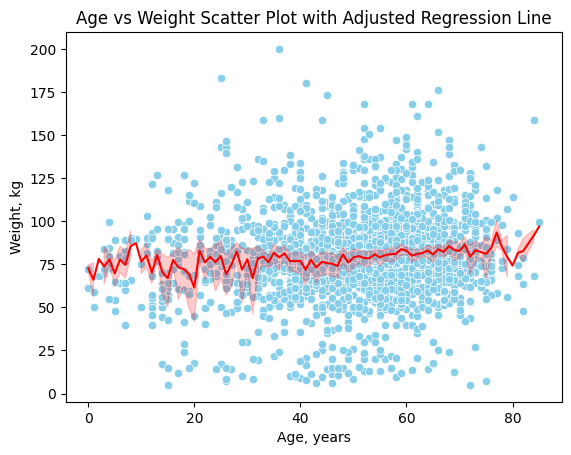

In [3]:
import statsmodels.formula.api as smf

# Run multiple linear regression
model = smf.ols(formula='don_wgt_kg ~ age + don_hgt_cm + dx', data=data).fit()

# Predict values
data['predicted'] = model.predict(data[['age', 'don_hgt_cm', 'dx']])

# Create a scatter plot of age vs weight
sns.scatterplot(x='age', y='don_wgt_kg', data=data, color='skyblue')

# Add the regression line
sns.lineplot(x='age', y='predicted', data=data, color='red')

# Styling
plt.title('Age vs Weight Scatter Plot with Adjusted Regression Line')
plt.xlabel('Age, years')
plt.ylabel('Weight, kg')

# Save the figure
plt.savefig('age_weight_regline.png')
plt.show()
